# Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
cwd_path = Path(os.getcwd())

In [3]:
for dirroot, dirnames, filenames in os.walk(os.getcwd()):
    print(os.path.basename(dirroot))
    for file in filenames:
        print(f'---{file}')

sentiment_analysis
---.gitignore
---quick_analysis.py
---sa_trends.ipynb
.ipynb_checkpoints
---sa_trends-checkpoint.ipynb
data
cleaned
---potential_companies_by_news_volume.csv
raw
---sentiment_all.csv
---sentiment_sample.csv


In [62]:
try_file = cwd_path / 'data' / 'raw' / 'sentiment_all.csv'

In [63]:
download_csv = try_file if os.path.exists(try_file) else print('File not found.')

In [99]:
sent_df_raw = pd.read_csv(download_csv, header= 'infer')

In [100]:
def clean_company(ser : pd.Series, sep : str):
    return ser.split(sep)[1]

In [101]:
sent_df_raw.company.head().apply(clean_company, args= (':'))

0    cara_therapeutics_inc
1    cara_therapeutics_inc
2    cara_therapeutics_inc
3    cara_therapeutics_inc
4    cara_therapeutics_inc
Name: company, dtype: object

In [102]:
sent_df = sent_df_raw.copy()

In [103]:
sent_df.company = sent_df.company.apply(clean_company, args= (':'))

In [104]:
sent_df.company.nunique()

203

In [105]:
def series_opi(ser : pd.Series, operator, value):
    return eval(f'ser[ser {operator} {value}]')

In [175]:
sent_df.groupby('company').volume.mean().sort_values(ascending= False).pipe(series_opi, operator= '>', value= '10')

company
morgan_stanley            263.995755
tesla_motors              224.777885
bank_of_america           191.449633
airbus                    118.677538
wells_fargo               116.749325
nvidia                    109.029525
johnson_johnson           100.788499
oracle                     99.568506
at_t                       96.742377
walmart                    78.503474
salesforce_com             69.479931
american_express           69.317252
chevron                    65.377846
merckco                    62.109417
starbucks                  61.725589
honda                      60.939985
nissan                     59.291779
paypal                     58.420301
comcast                    56.089927
pepsico                    48.940949
delta_air_lines            48.851602
fedex                      41.137978
infosys_ltd                40.098418
marriott_international     35.302200
american_airlines          29.323620
micron_technology          29.187186
gamestop                   29.

In [ ]:
cvs_health = sent_df.query("company == 'cvs_health'").loc[:,['date', 'sentiment']]

In [ ]:
cvs_health.index = pd.to_datetime(cvs_health.date)

In [ ]:
cvs_health.drop('date', axis= 1, inplace= True)

In [133]:
cvs_health

sentiment
date                 
2010-01-01   0.500000
2010-01-02   0.500000
2010-01-03   0.500000
2010-01-04   0.500000
2010-01-05   0.500000
...               ...
2024-03-05   0.642857
2024-03-06   0.888889
2024-03-07   0.952381
2024-03-08   0.941176
2024-03-09   0.800000

[5182 rows x 1 columns]

In [167]:
np.log((cvs_health * 100)).diff().cumsum()

sentiment
date                 
2010-01-01        NaN
2010-01-02   0.000000
2010-01-03   0.000000
2010-01-04   0.000000
2010-01-05   0.000000
...               ...
2024-03-05   0.251314
2024-03-06   0.575364
2024-03-07   0.644357
2024-03-08   0.632523
2024-03-09   0.470004

[5182 rows x 1 columns]

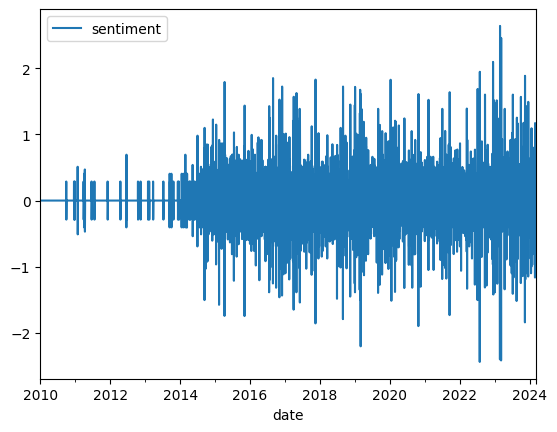

In [168]:
np.log((cvs_health * 100)).diff().plot()
plt.show()

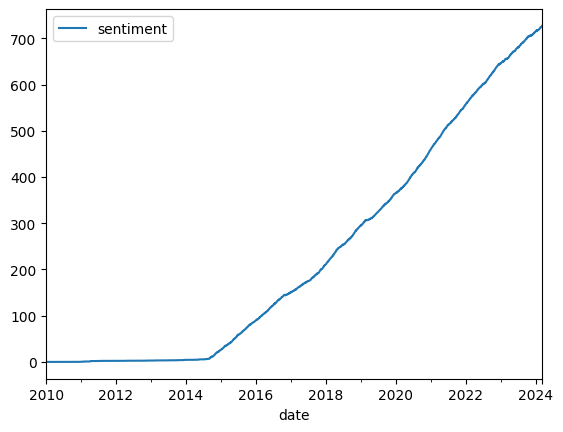

In [171]:
(cvs_health - 0.5).cumsum().plot()
plt.show()

In [173]:
(cvs_health - 0.5).sum()

sentiment    726.829829
dtype: float64

In [187]:
top_10 = ['morgan_stanley', 'tesla_motors', 'bank_of_america', 'airbus', 'wells_fargo', 'nvidia', 'johnson_johnson', 'oracle', 'at_t', 'walmart']

In [207]:
top_df = sent_df.query("company == @top_10").loc[:,['date', 'company', 'sentiment']]

In [208]:
top_df.index = pd.to_datetime(top_df.date)

In [210]:
top_df.drop('date', axis= 1, inplace= True)

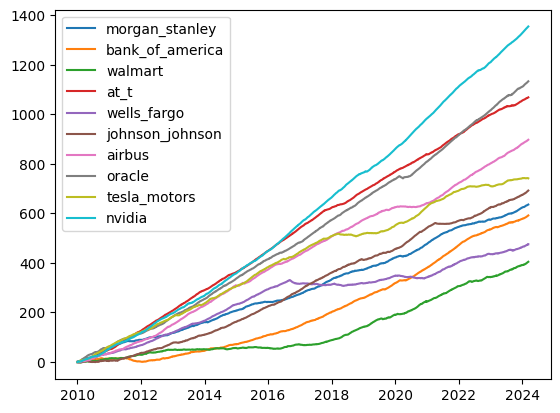

In [215]:
fig, ax = plt.subplots(1,1)
for comp in top_df.company.unique():
    comp_df = top_df.loc[top_df.company == comp]
    ax.plot(comp_df.index, (comp_df.sentiment - 0.5).cumsum(), label= comp)
ax.legend()
plt.show()

In [217]:
tickers = ["MS", "TSLA", "BAC", "AIR", "WFC", "NVDA", "JNJ", "ORCL", "T", "WMT"]

In [260]:
test_df = yf.download(tickers, period= 'max')

[*********************100%***********************]  10 of 10 completed


In [261]:
stock_df = test_df.copy()

In [262]:
stock_df.head()

Price      Close                                               ... Volume      \
Ticker       AIR BAC       JNJ  MS NVDA ORCL   T TSLA WFC WMT  ...    AIR BAC   
Date                                                           ...              
1962-01-02   NaN NaN  0.061495 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN NaN   
1962-01-03   NaN NaN  0.060539 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN NaN   
1962-01-04   NaN NaN  0.059902 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN NaN   
1962-01-05   NaN NaN  0.058946 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN NaN   
1962-01-08   NaN NaN  0.057990 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN NaN   

Price                                              
Ticker         JNJ  MS NVDA ORCL   T TSLA WFC WMT  
Date                                               
1962-01-02       0 NaN  NaN  NaN NaN  NaN NaN NaN  
1962-01-03  345600 NaN  NaN  NaN NaN  NaN NaN NaN  
1962-01-04  216000 NaN  NaN  NaN NaN  NaN NaN NaN  
1962-01-05  129600 NaN  NaN  NaN NaN  NaN NaN NaN  
1962-01-08  172800 NaN  NaN  NaN NaN  NaN NaN NaN  

[5 rows x 50 columns]

In [267]:
stock_swdf = stock_df.swaplevel(1, 0, axis= 1)

In [274]:
stock_swdf = stock_swdf.loc[stock_swdf.index > '2010-01-01']

In [275]:
stock_swdf.AIR.Close

Date
2010-01-04    21.482334
2010-01-05    21.898056
2010-01-06    23.000641
2010-01-07    23.362144
2010-01-08    22.991604
                ...    
2025-05-21    60.360001
2025-05-22    60.090000
2025-05-23    59.759998
2025-05-27    61.750000
2025-05-28    62.014999
Name: Close, Length: 3874, dtype: float64

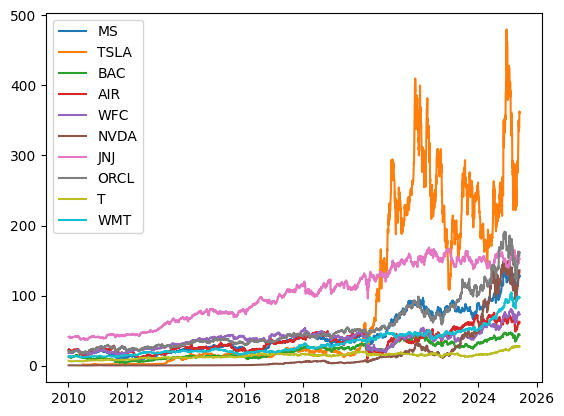

In [276]:
fig, ax = plt.subplots(1,1)
for comp in tickers:
    comp_ser = stock_swdf[comp].Close
    ax.plot(comp_ser.index, comp_ser, label= comp)
ax.legend()
plt.show()

In [279]:
np.corrcoef([1,2,3], [1,2,3])

array([[1., 1.],
       [1., 1.]])

In [286]:
top_10_dict = dict(zip(top_10, tickers))

In [291]:
top_10_dict

{'morgan_stanley': 'MS',
 'tesla_motors': 'TSLA',
 'bank_of_america': 'BAC',
 'airbus': 'AIR',
 'wells_fargo': 'WFC',
 'nvidia': 'NVDA',
 'johnson_johnson': 'JNJ',
 'oracle': 'ORCL',
 'at_t': 'T',
 'walmart': 'WMT'}

In [345]:
top_10_dict.keys()

dict_keys(['morgan_stanley', 'tesla_motors', 'bank_of_america', 'airbus', 'wells_fargo', 'nvidia', 'johnson_johnson', 'oracle', 'at_t', 'walmart'])

In [292]:
sent_df_test = sent_df.copy()

In [365]:
def set_ticker(ser : pd.Series, ticker_dict : dict):
    if ser.company in ticker_dict.keys():
        ser = pd.concat([ser, pd.Series({'ticker':ticker_dict[ser.company]})])
    else:
        ser = pd.concat([ser, pd.Series({'ticker':pd.NA})])
    return ser

In [366]:
sent_df_test.iloc[0:2].apply(set_ticker, axis= 1, args= (top_10_dict,))

date                company  volume  positive  negative  sentiment  \
0  2010-01-01  cara_therapeutics_inc       0         0         0        0.5   
1  2010-01-02  cara_therapeutics_inc       0         0         0        0.5   

   esg_score  e_score  s_score  g_score  general_risk_score  esg_risk_score  \
0        5.0      5.0      5.0      5.0                 0.0             0.0   
1        5.0      5.0      5.0      5.0                 0.0             0.0   

   credit_risk_score  immediate_risk_score          ISIN ticker  
0                0.0                   0.0  US1407551092   <NA>  
1                0.0                   0.0  US1407551092   <NA>

In [281]:
pd.DataFrame(stock_swdf.MS.Close, )

Date
2010-01-04     22.148869
2010-01-05     22.958591
2010-01-06     23.252380
2010-01-07     23.589153
2010-01-08     23.109062
                 ...    
2025-05-21    125.300003
2025-05-22    126.260002
2025-05-23    126.070000
2025-05-27    129.210007
2025-05-28    127.660004
Name: Close, Length: 3874, dtype: float64

In [368]:
sent_df.company.unique()

array(['cara_therapeutics_inc', 'morgan_stanley', 'carnival___plc',
       'international_consolidated_airlines',
       'renewable_energy_group_inc', 'penn_national_gaming_inc',
       'the_blackstone_group', 'teladoc_health', 'urban_one_inc',
       'papa_johns', 'align_biopharma', 'cloudflare_inc',
       'nortonlifelock_inc', 'weibo_corp', 'sangamo_therapeutics_inc',
       'sunrun_inc', 'bank_of_america', 'imax_corporation',
       'tupperware_brands_corporation', 'kroger', 'firstenergy',
       'ngl_energy_partners_lp', 'gan_limited',
       'crowdstrike_holdings_inc_a', 'general_mills', 'tetra_tech_inc',
       'wave_life_sciences_ltd', 'cvs_health', 'wynn_resorts',
       'newell_brands', 'wheaton_precious_metals_corp',
       'american_airlines', 'guardant_health_inc', 'united_technologies',
       'stitch_fix_incclass_a', 'smartrent_inc', 'dow_inc', 'guess_inc',
       '3m', 'matinas_biopharma_holdings_i', 'stmicroelectronics',
       'ag_mortgage_investment_trust_inc', 'merc

In [369]:
all_tickers = ["CARA", "MS", "CCL", "IAG", "REGI", "PENN", "BX", "TDOC", "UONE", "PZZA", "NET", "NLOK", "WB", "SGMO", "RUN", "BAC", "IMAX", "TUP", "KR", "FE", "NGL", "GAN", "CRWD", "GIS", "TTEK", "WVE", "CVS", "WYNN", "NWL", "WPM", "AAL", "GH", "RTX", "SFIX", "SMRT", "DOW", "GES", "MMM", "MTNB", "STM", "MITT", "MRK", "FNKO", "AMAT", "MRO", "IOVA", "FRO", "GBR", "FTNT", "HA", "OKE", "MOMO", "DUK", "EAT", "P911", "D", "SYY", "CROX", "TTWO", "UA", "CPE", "O", "GPRO", "X", "STX", "LI", "PLAY", "ANET", "CARV", "DVAX", "PLYA", "ARCT", "ICLN", "AKBA", "WMT", "OVV", "CVX", "NSANY", "T", "SNAP", "TRMD", "HMC", "INFY", "PEP", "NOG", "PAYS", "USAS", "BJ", "SAND", "HRTX", "VLRS", "IAG", "ENPH", "CTMX", "ABR", "WFC", "LULU", "KEY", "TME", "MAR", "CRC", "ACIU", "OVID", "PDS", "DAL", "INUV", "QD", "CRK", "QSR", "AHT", "SLB", "JNJ", "CRSP", "KIRK", "TNDM", "COP", "BYD", "COTY", "IIPR", "HMY", "SABR", "JFIN", "AUPH", "XPO", "STAG", "ABIO", "CWEN", "ENB", "LYG", "AIR", "VERI", "MNOV", "DBX", "CMCSA", "TSN", "AXP", "WDC", "SIX", "DLTR", "PYPL", "SGRY", "CAKE", "VIVE", "FET", "MRVL", "GD", "SBUX", "SPLK", "LRCX", "ORCL", "EXEL", "TRTX", "WMG", "SAN", "GME", "MDB", "VSTO", "BNED", "DXCM", "FDX", "IFMK", "PSEC", "GLW", "BND", "EXK", "YELP", "HAS", "WDAY", "CNDT", "TSLA", "RIOT", "WFT", "TGB", "HIMX", "MVIS", "MGM", "GT", "IBN", "ENSV", "LADR", "RBGLY", "BLDP", "OPTT", "GRPN", "BCRX", "PDD", "JBLU", "GOOS", "DDOG", "HL", "RWT", "P", "JAKK", "CRM", "NKLA", "MPC", "NVDA", "ATNM", "OPK", "MU", "BEP", "BNTX"]

In [370]:
len(all_tickers)

202

In [371]:
all_tickers_dict = dict(zip(sent_df.company.unique(), all_tickers))

In [377]:
sent_df.insert(column= 'ticker', loc=2, value= sent_df.company.map(all_tickers_dict))

In [387]:
sent_df = sent_df.drop('ticker', axis= 1)

In [388]:
sent_df.tail()

date      company  volume  positive  negative  sentiment  \
1048570  2014-12-12  biontech_se       0         0         0        0.5   
1048571  2014-12-13  biontech_se       0         0         0        0.5   
1048572  2014-12-14  biontech_se       0         0         0        0.5   
1048573  2014-12-15  biontech_se       0         0         0        0.5   
1048574  2014-12-16  biontech_se       0         0         0        0.5   

         esg_score  e_score  s_score  g_score  general_risk_score  \
1048570        5.0      5.0      5.0      5.0                 0.0   
1048571        5.0      5.0      5.0      5.0                 0.0   
1048572        5.0      5.0      5.0      5.0                 0.0   
1048573        5.0      5.0      5.0      5.0                 0.0   
1048574        5.0      5.0      5.0      5.0                 0.0   

         esg_risk_score  credit_risk_score  immediate_risk_score          ISIN  
1048570             0.0                0.0                   0.0  US09075V1026  
1048571             0.0                0.0                   0.0  US09075V1026  
1048572             0.0                0.0                   0.0  US09075V1026  
1048573             0.0                0.0                   0.0  US09075V1026  
1048574             0.0                0.0                   0.0  US09075V1026